# FordGoBike
## by Mayar Mohsen

## Investigation Overview

> *In this presentation, we will focus on the member genders (Males, Females, Others) and user type (Customer, Subscriber) and see the difference between them in member birth year and trips duration*

## Dataset Overview

> *This data set includes information about individual rides made 
in a bike-sharing system covering the greater San Francisco 
Bay area*

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike.csv')
df.shape

(174952, 19)

In [12]:
def category (column, categories):
    classes = categories
    typ = pd.api.types.CategoricalDtype(ordered=True, categories=classes)
    df[column] = df[column].astype(typ)
    return df

In [13]:
category('member_gender', ['Male', 'Female', 'Other'])
category('user_type', ['Customer', 'Subscriber'])

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date
0,0,52185,17:32:10.1450,08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,2019-03-01
1,2,61854,12:13:13.2180,05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,2019-03-01
2,3,36490,17:54:26.0100,04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,2019-03-01
3,4,1585,23:54:18.5490,00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,2019-03-01
4,5,1793,23:49:58.6320,00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,2019-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174947,183407,480,00:04:49.7240,00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,2019-02-01,2019-02-01
174948,183408,313,00:05:34.7440,00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,2019-02-01,2019-02-01
174949,183409,141,00:06:05.5490,00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,2019-02-01,2019-02-01
174950,183410,139,00:05:34.3600,00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,2019-02-01,2019-02-01


 ## Note:
<span style="color: purple"> **In the following presentation, the member birth year will be starting from 1940 and the duration will end at 3000, to remove the outliers so we can have a better look on the data**

## Member gender

- <span style="color:green"> Males have the greatest number then females then others

Text(0, 0.5, 'count')

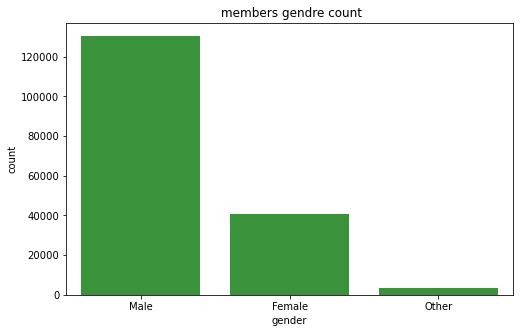

In [4]:
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[2]
sb.countplot(data = df, x='member_gender', color=base_color)

plt.title(' members gendre count')
plt.xlabel('gender')
plt.ylabel('count')

## Member gender VS. Member birth year
> - <span style="color:green"> Older males have the higher range in participating <br>
> - <span style="color:green"> yonger females have the higher range in participating <br>
> - <span style="color:green"> Others are younger than males and older than females <br>

Text(0, 0.5, 'member birth year')

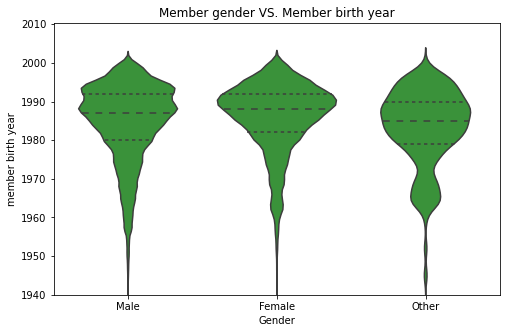

In [5]:
plt.figure(figsize=[8,5])
sb.violinplot(data=df, x='member_gender', y='member_birth_year', inner ='quartile' ,  color = base_color)
plt.ylim(1940)

plt.title('Member gender VS. Member birth year')
plt.xlabel('Gender')
plt.ylabel('member birth year')

## Member gender VS. Duration

> - <span style="color:green"> Males have the shortest duration trips <br>
> - <span style="color:green"> Females have a long duration trips "longer than males but shorter than others"<br> 
> - <span style="color:green"> Others have the longest duration trips<br> 

Text(0, 0.5, 'duration')

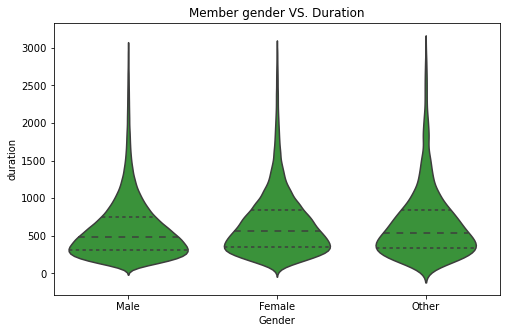

In [6]:
plt.figure(figsize=[8,5])
df_edited = df.query('duration_sec < 3000')
sb.violinplot(data=df_edited, x='member_gender', y='duration_sec', inner ='quartile' ,  color = base_color)

plt.title('Member gender VS. Duration')
plt.xlabel('Gender')
plt.ylabel('duration')

## Member birth year VS. Duration VS. Member gender

> - <span style="color:green"> Males born from 1980 to 2000 mostly have trips from 0 to 500 seconds
> - <span style="color:green"> Females born from 1980 to 2000 mostly have trips from 0 to 1000 seconds
> - <span style="color:green"> Others born from 1975 to 2000 mostly have trips from 0 to 1000 seconds

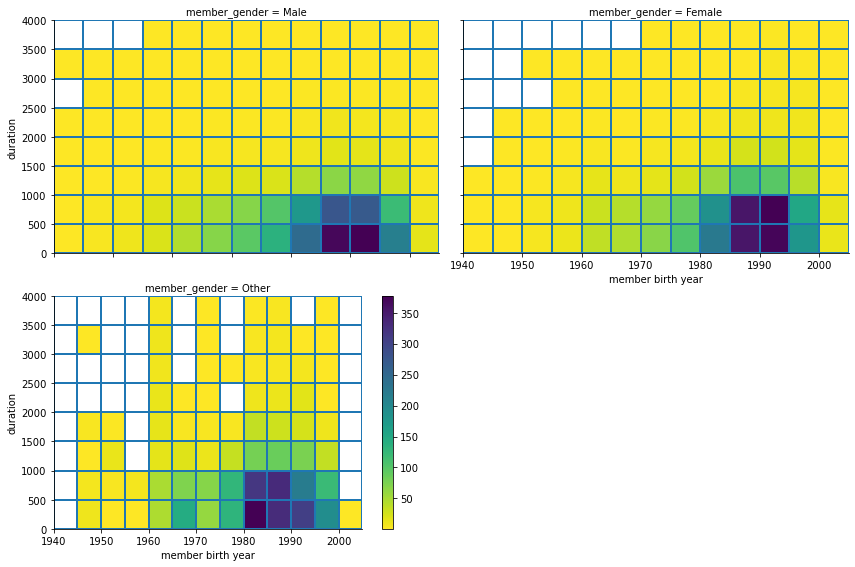

In [7]:
bins_x = np.arange(1940, df['member_birth_year'].max()+5,5)
bins_y = np.arange(0, 4000+500,500)

g = sb.FacetGrid(data=df, col='member_gender', size=4, aspect=1.5, col_wrap=2)
g.map(plt.hist2d, 'member_birth_year', 'duration_sec',bins=[bins_x,bins_y], cmin=0.5, cmap='viridis_r')
plt.colorbar()

g.set_xlabels('member birth year')
g.set_ylabels('duration')

## User types
- <span style="color:blue"> Number of subscribers is much greater than number of customers <br></span>


Text(0, 0.5, 'count')

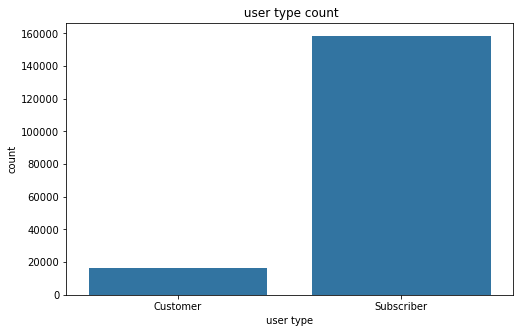

In [8]:
plt.figure(figsize=[8,5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x='user_type', color=base_color)

plt.title(' user type count')
plt.xlabel('user type')
plt.ylabel('count')

## User type VS. Member birth year
- <span style="color:blue"> Both the customers and subscribers are the same <br></span>

Text(0, 0.5, 'member birth year')

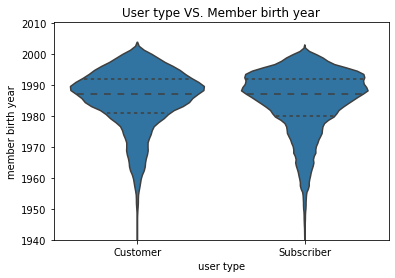

In [9]:
sb.violinplot(data=df, x='user_type', y='member_birth_year', color=base_color, inner='quartile')
plt.ylim(1940)
plt.title('User type VS. Member birth year')
plt.xlabel('user type')
plt.ylabel('member birth year')

## User type VS. Duration
> - <span style="color:blue"> subiscribers have a shortest duration trips than the customers

Text(0, 0.5, 'duration')

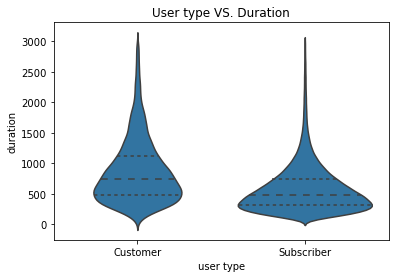

In [10]:
sb.violinplot(data=df_edited, x='user_type', y='duration_sec', color=base_color, inner='quartile')

plt.title('User type VS. Duration')
plt.xlabel('user type')
plt.ylabel('duration')

## Member birth year VS. Duration VS. User type

> -  <span style="color:blue"> Customers born from 1980 to 2000 mostly have trips from 500 to 1000 seconds
> -  <span style="color:blue"> subscribers born from 1980 to 2000 mostly have trips from 0 to 500 seconds

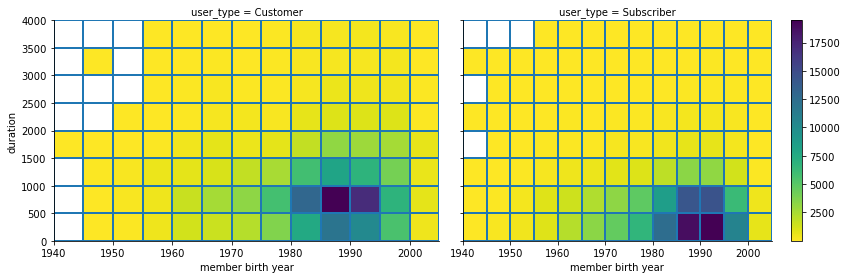

In [11]:
bins_x = np.arange(1940, df['member_birth_year'].max()+5,5)
bins_y = np.arange(0, 4000+500,500)

g = sb.FacetGrid(data=df, col='user_type', size=4, aspect=1.5)
g.map(plt.hist2d, 'member_birth_year', 'duration_sec',bins=[bins_x,bins_y], cmin=0.5, cmap='viridis_r')
plt.colorbar()

g.set_xlabels('member birth year')
g.set_ylabels('duration')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!